In [220]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [221]:
path ='/content/drive/Shareddrives/데이터 청년 캠퍼스/젓가락질 데이터/새 젓가락질 데이터/excel 파일/vector/newdata_all_0818_ver1_final.xlsx'

In [222]:
import pandas as pd
import numpy as np

In [223]:
data = pd.read_excel(path)

In [224]:
data[data['y']==1]

,x_4-3,y_4-3,z_4-3,x_7-6,y_7-6,z_7-6,x_8-7,y_8-7,z_8-7,x_11-10,y_11-10,z_11-10,x_12-11,y_12-11,z_12-11,x_15-14,y_15-14,z_15-14,x_16-15,y_16-15,z_16-15,d_ratio,"약중, 중검 sin차",y,image
458,-0.050499,-0.096789,-0.004149,-0.065824,0.017185,-0.030639,-0.051809,0.031795,-0.019083,-0.056468,0.045383,-0.031966,-0.043653,0.050203,-0.011863,0.005273,0.095492,-0.021605,0.004449,0.066515,-0.001972,2.335702,0.418055,1,correct18.MP4_000003.040.jpg
459,-0.045597,-0.095922,-0.007820,-0.067625,0.025150,-0.036259,-0.048180,0.024944,-0.023464,-0.049121,0.074268,-0.028600,-0.031525,0.044615,0.001884,-0.000689,0.104183,-0.023285,0.006173,0.053962,0.005258,1.060104,0.031185,1,correct18.MP4_000003.160.jpg
460,-0.046064,-0.101250,-0.012496,-0.066167,0.021700,-0.032029,-0.047121,0.033193,-0.015409,-0.055864,0.055993,-0.032659,-0.040520,0.050498,-0.003940,-0.010193,0.100900,-0.028670,-0.004660,0.066045,-0.002595,1.525121,0.190338,1,correct18.MP4_000003.281.jpg
461,-0.044232,-0.095748,-0.022823,-0.065586,0.018020,-0.050544,-0.049288,0.033734,-0.036613,-0.056635,0.051073,-0.052325,-0.035887,0.048859,-0.027687,-0.026183,0.075688,-0.050305,-0.012808,0.054766,-0.020711,1.001780,0.038810,1,correct18.MP4_000003.400.jpg
462,-0.047409,-0.094231,-0.023750,-0.063951,0.017307,-0.040269,-0.047503,0.015823,-0.027124,-0.038447,0.074010,-0.041358,-0.015953,0.046753,-0.011920,-0.005354,0.096254,-0.032362,0.004490,0.050607,-0.007475,0.758280,0.260717,1,correct18.MP4_000003.521.jpg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,-0.057392,-0.140165,-0.008456,-0.074975,0.034949,-0.071350,-0.049709,0.089724,-0.050381,-0.080636,0.055457,-0.103652,-0.051093,0.082187,-0.073307,-0.073274,0.065841,-0.117383,-0.044392,0.080432,-0.072210,1.230190,0.053147,1,correct4.mp4_000005.383.jpg
1184,-0.059703,-0.131541,-0.004620,-0.072885,0.028398,-0.073373,-0.049064,0.088463,-0.048969,-0.080332,0.040256,-0.102161,-0.053878,0.075695,-0.072372,-0.075949,0.057289,-0.122773,-0.050837,0.075260,-0.079431,1.580634,0.015383,1,correct4.mp4_000005.450.jpg
1185,-0.059844,-0.131576,-0.006878,-0.066692,0.025098,-0.070125,-0.041511,0.093577,-0.051930,-0.073747,0.041362,-0.099599,-0.044907,0.084649,-0.073877,-0.065719,0.057927,-0.117041,-0.037712,0.083243,-0.077085,1.339072,0.008756,1,correct4.mp4_000005.517.jpg
1186,-0.061015,-0.134970,-0.003229,-0.067992,0.036482,-0.071695,-0.043140,0.099050,-0.048635,-0.074719,0.048547,-0.098355,-0.047928,0.086957,-0.071311,-0.069560,0.061675,-0.121139,-0.044486,0.085093,-0.078301,1.512748,0.021204,1,correct4.mp4_000005.583.jpg


In [225]:
X = data.drop(['y','image'], axis = 1)

In [226]:
y = data["y"]

#모델

In [227]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=104)

In [228]:
X_test= pd.concat([X[int(0.8*457):457],X[1041:1187]])
y_test= pd.concat([y[int(0.8*457):457],y[1041:1187]])
X_train = X.drop(X_test.index)
X_train.reset_index(drop=True, inplace=True)
y_train = y.drop(y_test.index)
y_train.reset_index(drop=True, inplace=True)

In [229]:
y_test

365     0
366     0
367     0
368     0
369     0
       ..
1182    1
1183    1
1184    1
1185    1
1186    1
Name: y, Length: 238, dtype: int64

#데이터 정규화

In [230]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test= scaler.fit_transform(X_test)

In [231]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from scipy.stats import norm, boxcox
from scipy import stats
from collections import Counter
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.metrics import roc_curve
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [232]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def metrics(y_true, y_pred):
    print('Confusion Matrix:\n', confusion_matrix(y_true, y_pred))
    print('\n\nAccuracy Score:\n', accuracy_score(y_true, y_pred))
    print('\n\nClassification Report: \n', classification_report(y_true, y_pred))

def predictions(model,X_train=X_train, X_test=X_test, y_train=y_train, y_test=y_test):
      model.fit(X_train, y_train)
      #predictions
      train_pred = model.predict(X_train)
      test_pred = model.predict(X_test)
      actual = [y_train, y_test]
      pred = [train_pred, test_pred]
      for i in range(0,2):
          if i==0:
              print('----Train Metrics----')
          else:
              print('----Test Metrics----')
          metrics(actual[i], pred[i])

In [233]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
predictions(dt)
dt.feature_importances_

----Train Metrics----
Confusion Matrix:
 [[366   0]
 [  0 584]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       366
           1       1.00      1.00      1.00       584

    accuracy                           1.00       950
   macro avg       1.00      1.00      1.00       950
weighted avg       1.00      1.00      1.00       950

----Test Metrics----
Confusion Matrix:
 [[34 58]
 [61 85]]


Accuracy Score:
 0.5


Classification Report: 
               precision    recall  f1-score   support

           0       0.36      0.37      0.36        92
           1       0.59      0.58      0.59       146

    accuracy                           0.50       238
   macro avg       0.48      0.48      0.48       238
weighted avg       0.50      0.50      0.50       238



array([0.0471474 , 0.05244158, 0.07904753, 0.0214792 , 0.13046611,
       0.02252383, 0.00355566, 0.00592609, 0.02372526, 0.41184811,
       0.        , 0.0417635 , 0.00428583, 0.00333343, 0.        ,
       0.01551305, 0.        , 0.05357122, 0.00879146, 0.01978174,
       0.03001874, 0.01258945, 0.01219082])

In [234]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
predictions(knn)

----Train Metrics----
Confusion Matrix:
 [[360   6]
 [ 18 566]]


Accuracy Score:
 0.9747368421052631


Classification Report: 
               precision    recall  f1-score   support

           0       0.95      0.98      0.97       366
           1       0.99      0.97      0.98       584

    accuracy                           0.97       950
   macro avg       0.97      0.98      0.97       950
weighted avg       0.98      0.97      0.97       950

----Test Metrics----
Confusion Matrix:
 [[60 32]
 [89 57]]


Accuracy Score:
 0.49159663865546216


Classification Report: 
               precision    recall  f1-score   support

           0       0.40      0.65      0.50        92
           1       0.64      0.39      0.49       146

    accuracy                           0.49       238
   macro avg       0.52      0.52      0.49       238
weighted avg       0.55      0.49      0.49       238



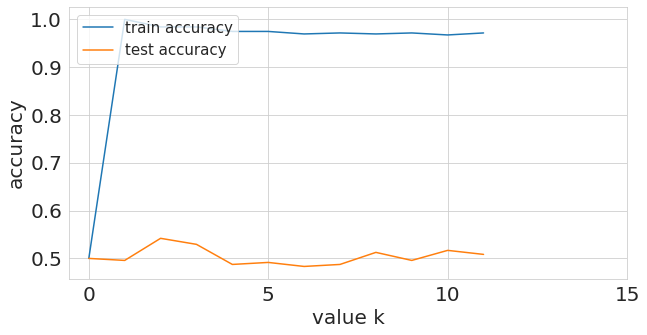

In [235]:
import matplotlib
matplotlib.rc("xtick", labelsize=20)
matplotlib.rc("ytick", labelsize=20)

train_accuracies = [0.5]
test_accuracies = [0.5]

for k in range(1, 12):
    clf = KNeighborsClassifier(n_neighbors=k)
    
    # Train model
    clf.fit(X_train, y_train)
    # Create train and test predictions
    train_predictions = clf.predict(X_train)
    test_predictions = clf.predict(X_test)
    # Calculate training and test accuracies
    train_accuracy = accuracy_score(y_train, train_predictions)
    test_accuracy = accuracy_score(y_test, test_predictions)
    # Append accuracies
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
# Create plots
plt.figure(figsize=(10, 5))
sns.set_style("whitegrid")
plt.plot(train_accuracies, label="train accuracy")
plt.plot(test_accuracies, label="test accuracy")
plt.legend(loc="upper left", prop={"size" : 15})
plt.xticks(range(0, 16, 5))
plt.xlabel("value k", size=20)
plt.ylabel("accuracy", size=20)
plt.show()

In [236]:
from sklearn.ensemble import RandomForestClassifier
rf =RandomForestClassifier()
predictions(rf)

----Train Metrics----
Confusion Matrix:
 [[366   0]
 [  0 584]]


Accuracy Score:
 1.0


Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       366
           1       1.00      1.00      1.00       584

    accuracy                           1.00       950
   macro avg       1.00      1.00      1.00       950
weighted avg       1.00      1.00      1.00       950

----Test Metrics----
Confusion Matrix:
 [[35 57]
 [83 63]]


Accuracy Score:
 0.4117647058823529


Classification Report: 
               precision    recall  f1-score   support

           0       0.30      0.38      0.33        92
           1       0.53      0.43      0.47       146

    accuracy                           0.41       238
   macro avg       0.41      0.41      0.40       238
weighted avg       0.44      0.41      0.42       238



#MLP

In [237]:
print("shape of X: {}\nshape of y: {}".format(X.shape,y.shape))

shape of X: (1188, 23)
shape of y: (1188,)
